## Sattellite Image classification

#### Import necessary libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [2]:
pwd

'C:\\Users\\Kavya\\Desktop\\Edure\\DEEP LEARNING\\Capstone projects\\Satellite image classification'

In [3]:
import glob

In [4]:
cloudy = glob.glob('data/cloudy/*.jpg')
desert = glob.glob('data/desert/*.jpg')
green_area = glob.glob('data/green_area/*.jpg')
water = glob.glob('data/water/*.jpg')

In [5]:
len(cloudy)

138

In [6]:
len(desert)

79

In [7]:
len(green_area)

207

In [8]:
len(water)

170

#### Fetch the testing data

In [9]:
cloudy_test = glob.glob('data/cloudy/*.jpg')
desert_test = glob.glob('data/desert/*.jpg')
green_area_test= glob.glob('data/green_area/*.jpg')
water_test = glob.glob('data/water/*.jpg')

#### Find the number of images of all classes in the Training set

In [10]:
print(f'Number of cloudy images {len(cloudy)}')
print(f'Number of desert images {len(desert)}')
print(f'Number of green area images {len(green_area)}')
print(f'Number of water images {len(water)}')

Number of cloudy images 138
Number of desert images 79
Number of green area images 207
Number of water images 170


#### Find the number of images of all classes in the testing set

In [11]:
print(f'Number of cloudy test images {len(cloudy_test)}')
print(f'Number of desert test images {len(desert_test)}')
print(f'Number of green test area images {len(green_area_test)}')
print(f'Number of water test images {len(water_test)}')

Number of cloudy test images 138
Number of desert test images 79
Number of green test area images 207
Number of water test images 170


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [12]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in water: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)


#### For Testing set

In [13]:
image_test = []
label_test = []

for i in cloudy_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in desert_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in green_area_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)

for i in water_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

#### Shuffle both image list and label list (In both Training and testing set)

##### Use shuffle function from sklearn utils

In [14]:
from sklearn.utils import shuffle

In [15]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [16]:
len(label_test)

594

#### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

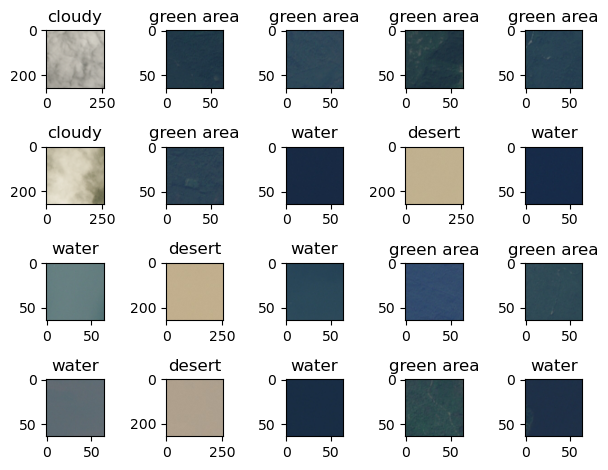

In [17]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])

    if label[i] == 0:
        plt.title('cloudy')
    elif label[i] == 1: 
        plt.title('desert')
    elif label[i] == 2:
        plt.title('green area')
    else:
        plt.title('water')
    plt.tight_layout()

#### Check the shape of the first 10 images in our list (Either from training or test set)

In [18]:
for i in range(10): 
    print(image[i].shape)

(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)


#### Reshape the images ( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [25]:
from skimage.transform import resize

In [26]:
xtrain = []
for i in image: 
    xtrain.append(resize(i,(256,256,3)))
xtrain = np.array(xtrain)

In [27]:
xtest = []
for i in image_test: 
    xtest.append(resize(i,(256,256,3)))
xtest = np.array(xtest)

#### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [28]:
ytrain = np.array(label)
ytest = np.array(label_test)

#### Plot some of our reshaped images

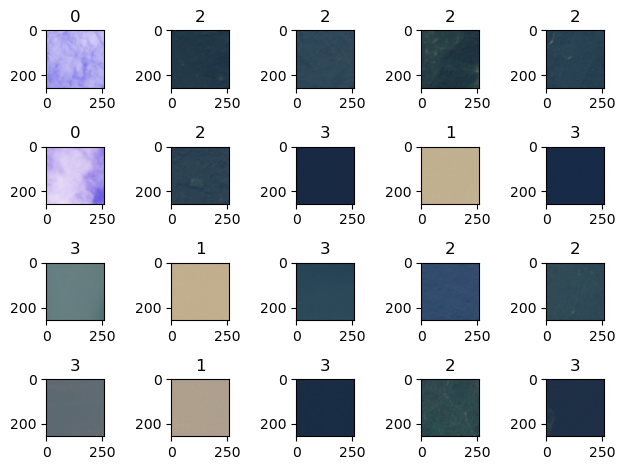

In [29]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [30]:
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:',xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (594, 256, 256, 3)
Shape of xtest is: (594, 256, 256, 3)
Shape of ytrain is: (594,)
Shape of ytest is: (594,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [31]:
from tensorflow import keras

In [32]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (256,256,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\Kavya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,924 (30.05 MB)

 Trainable params: 7,877,924 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [35]:
model.fit(xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.4536 - loss: 1.5191 - val_accuracy: 0.9167 - val_loss: 0.3610
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.8141 - loss: 0.3643 - val_accuracy: 0.9167 - val_loss: 0.2438
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.8258 - loss: 0.3396 - val_accuracy: 0.9167 - val_loss: 0.2427
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.8698 - loss: 0.3058 - val_accuracy: 0.9167 - val_loss: 0.2395
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.8413 - loss: 0.3813 - val_accuracy: 0.9333 - val_loss: 0.2015
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.9016 - loss: 0.2422 - val_accuracy: 0.9333 - val_loss: 0.1334
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9176 - loss: 0.1935 - val_accuracy: 0.9833 - val_loss: 0.1263
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.9057 - loss: 0.2078 - val_accuracy: 1

#### Evaluate the model

In [36]:
model.evaluate(xtrain, ytrain)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9413 - loss: 0.1550


[0.15335555374622345, 0.9444444179534912]

#### Make predictions with X_test

In [37]:
ypred = model.predict(xtest)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


#### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [38]:
ypred = ypred.argmax(axis=1)

#### Plot X_test with label from our prediction

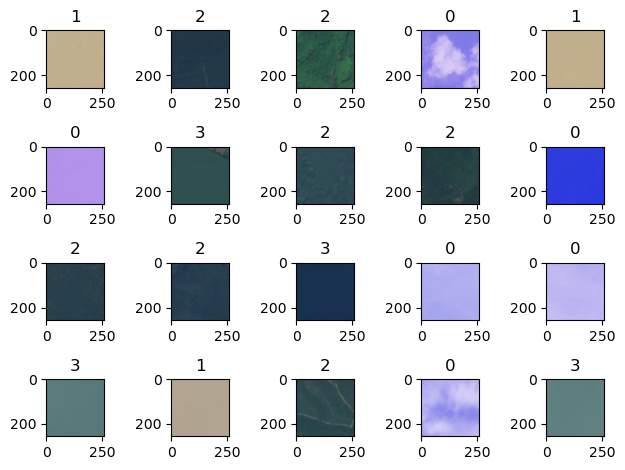

In [39]:
for i in range(20): 
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(label_test[i])
    plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

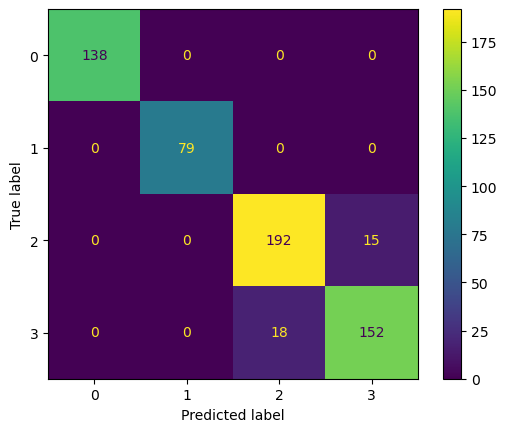

In [42]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)

In [52]:
from sklearn.metrics import classification_report,accuracy_score

In [53]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        79
           2       0.91      0.93      0.92       207
           3       0.91      0.89      0.90       170

    accuracy                           0.94       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.94      0.94      0.94       594

